In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [61]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [62]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [63]:
#checking null values
df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [64]:
df.shape

(4177, 9)

# Checking for Null values

In [65]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [66]:
# describing the data so that we can make aassumption for skewness and outliers
#If mean value is greater than 50%(median) value then we can say the data skewed data present if we have high gap between 75 and max. then we can say the Data is having Outliers
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


        - No missing values in the dataset
        - All numerical features but 'sex' is the object column
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except Height (requires re-check)
        - Each feature has difference scale range

# replacing the the min value 0 with mean value

In [67]:
df['Height']=df['Height'].replace(0,df['Height'].mean())


In [68]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# checking data distribution

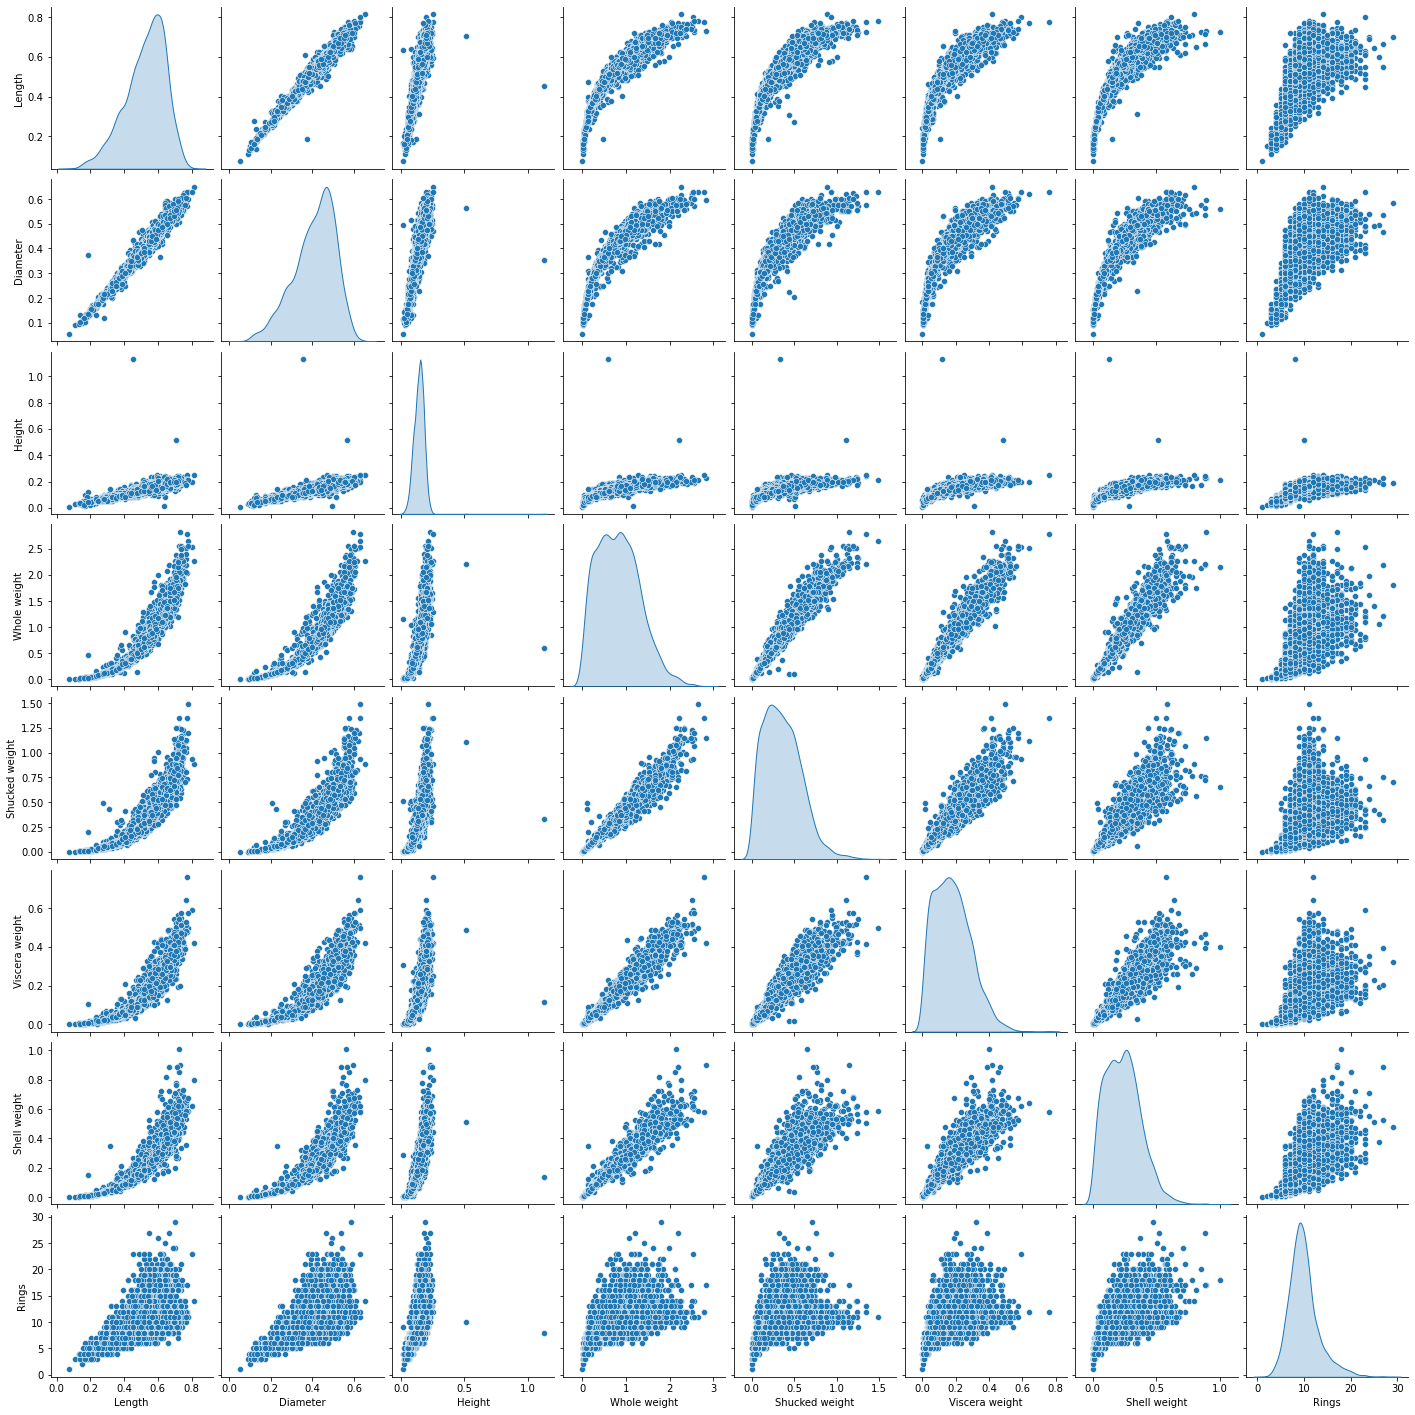

In [69]:
sns.pairplot(data=df,diag_kind='kde')

by checking the data distribution data looks not normally distributed

# checking for Skewness of Data

In [70]:
df.skew().sort_values(ascending=False)

Height            3.167124
Rings             1.114102
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Diameter         -0.609198
Length           -0.639873
dtype: float64

Height has highest skewedness followed by age

checking the counts of the label column

<AxesSubplot:xlabel='Sex', ylabel='count'>

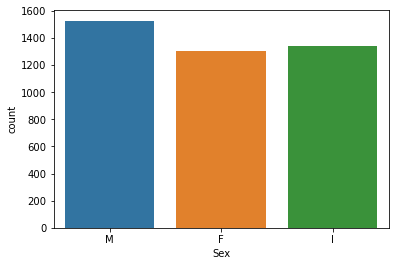

In [71]:
sns.countplot(x='Sex',data=df)

# Checking for Datatypes

In [72]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [73]:
from sklearn import preprocessing

In [74]:
lencode=preprocessing.LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])

In [75]:
df.Sex.unique()

array([2, 0, 1])

# correlation

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

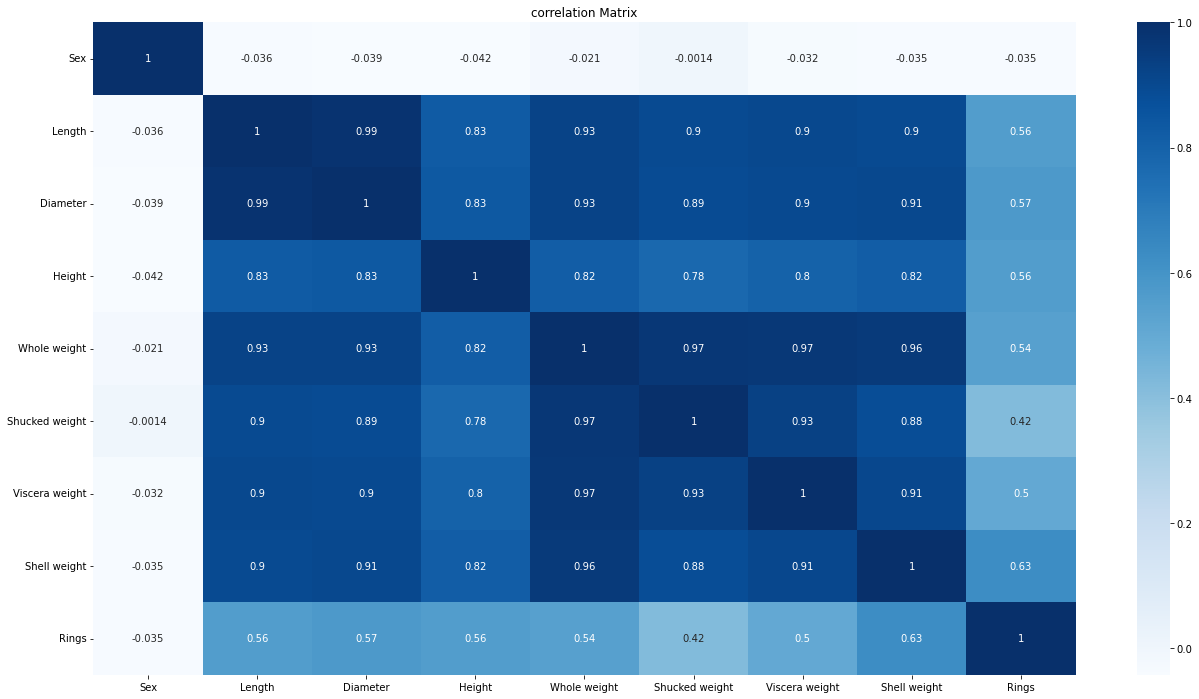

In [77]:
corr_mat=df.corr()#----------------> corelation function

plt.figure(figsize=[22,12])#-------> figure size dimetions
sns.heatmap(corr_mat,annot=True,cmap="Blues")#--> annot = true means will print values
plt.title("correlation Matrix")#---> title
plt.show()

In [78]:
df['Age']=0

In [79]:
def update_age (row):
    if row['Rings']>=1 and row['Rings']<=8:
        return 1
    elif row['Rings']>=9 and row['Rings']<=10:
        return 2
    elif row['Rings']>=11 and row['Rings']<=29:
        return 3
    return 0

In [80]:
df['Age']=df.apply(lambda row: update_age(row),axis=1)

In [81]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age                 int64
dtype: object

In [82]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [83]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Sex,1.000000,-0.036066,-0.038874,-0.042293,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,-0.032806
Length,-0.036066,1.000000,0.986812,0.827748,0.925261,0.897914,0.903018,0.897706,0.556720,0.583693
Diameter,-0.038874,0.986812,1.000000,0.833931,0.925452,0.893162,0.899724,0.905330,0.574660,0.599885
Height,-0.042293,0.827748,0.833931,1.000000,0.819624,0.775406,0.798653,0.819455,0.557502,0.561843
Whole weight,-0.021391,0.925261,0.925452,0.819624,1.000000,0.969405,0.966375,0.955355,0.540390,0.581990
Shucked weight,-0.001373,0.897914,0.893162,0.775406,0.969405,1.000000,0.931961,0.882617,0.420884,0.493517
Viscera weight,-0.032067,0.903018,0.899724,0.798653,0.966375,0.931961,1.000000,0.907656,0.503819,0.564357
Shell weight,-0.034854,0.897706,0.905330,0.819455,0.955355,0.882617,0.907656,1.000000,0.627574,0.632789
Rings,-0.034627,0.556720,0.574660,0.557502,0.540390,0.420884,0.503819,0.627574,1.000000,0.825035
Age,-0.032806,0.583693,0.599885,0.561843,0.581990,0.493517,0.564357,0.632789,0.825035,1.000000


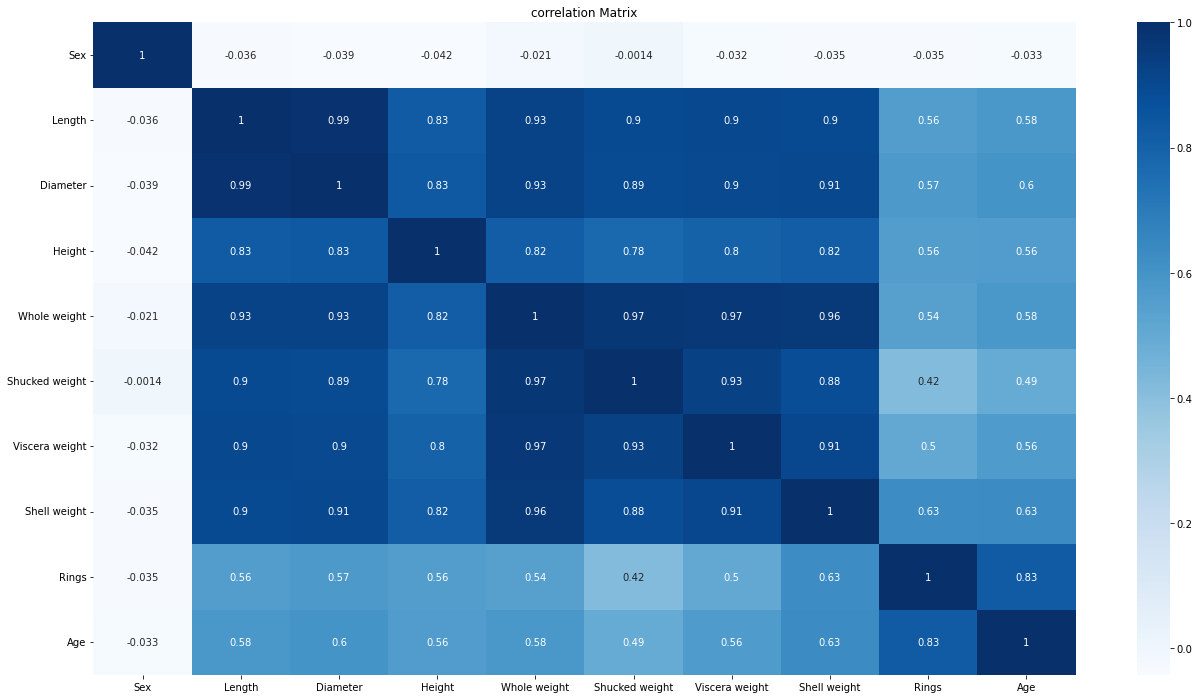

In [84]:
corr_mat=df.corr()#----------------> corelation function

plt.figure(figsize=[22,12])#-------> figure size dimetions
sns.heatmap(corr_mat,annot=True,cmap="Blues")#--> annot = true means will print values
plt.title("correlation Matrix")#---> title
plt.show()

# checking outliers by box plot

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
Age                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
dtype: object

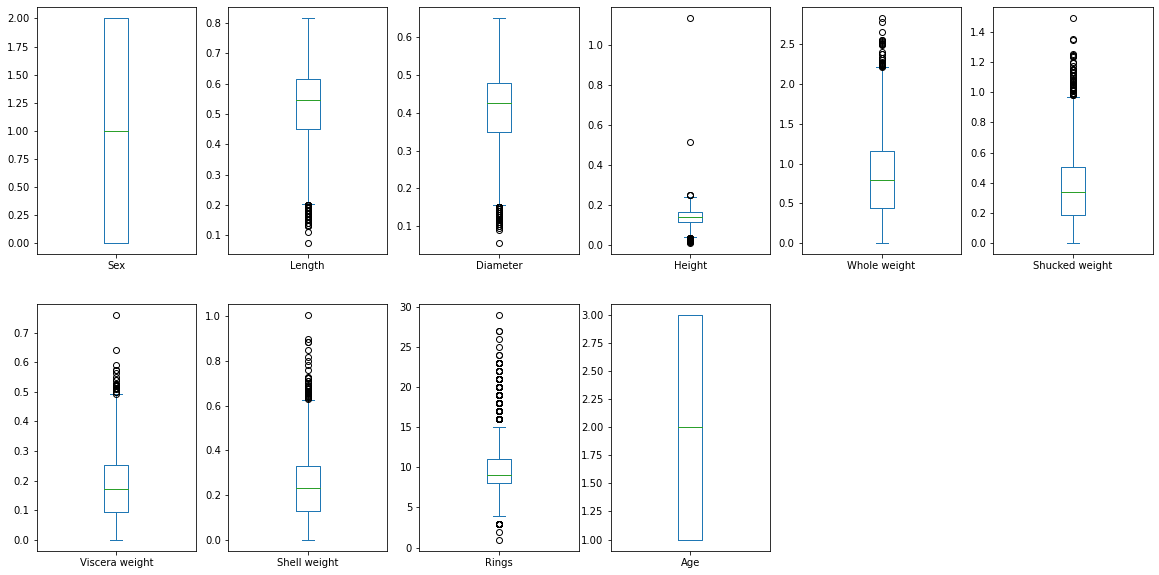

In [85]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(20,10))

# removing outliers by zscore method

In [86]:
 from scipy.stats import zscore

In [87]:
z=np.abs(zscore(df))
z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1.151980,0.574558,0.432149,1.068874,0.641898,0.607685,0.726212,0.638217,1.571544,1.198272
1,1.151980,1.448986,1.439929,1.188748,1.230277,1.170910,1.205221,1.212987,0.910013,1.221444
2,1.280690,0.050033,0.122130,0.109881,0.309469,0.463500,0.356690,0.207139,0.289624,0.011586
3,1.151980,0.699476,0.432149,0.349630,0.637819,0.648238,0.607600,0.602294,0.020571,0.011586
4,0.064355,1.615544,1.540707,1.428497,1.272086,1.215968,1.287337,1.320757,0.910013,1.221444
...,...,...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.609363,0.118813,0.047908,0.532900,0.073062,0.330765,1.198272
4173,1.151980,0.549706,0.323686,0.109881,0.279929,0.358808,0.309362,0.155685,0.020571,0.011586
4174,1.151980,0.632985,0.676409,1.568356,0.708212,0.748559,0.975413,0.496955,0.289624,0.011586
4175,1.280690,0.841182,0.777187,0.249741,0.541998,0.773341,0.733627,0.410739,0.020571,0.011586


In [88]:
threshold=3
print(np.where(z>3))


(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108, 2108,
       2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381, 2436,
       2459, 2471, 2544, 2623, 2624, 2624, 2624, 2

In [89]:
df_new=df[(z<3).all(axis=1)]

In [90]:
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [91]:
#describing the data after removing the data
df_new.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.00000,4029.000000,4029.000000,4029.000000
mean,1.051378,0.520913,0.405241,0.138003,0.802546,0.348991,0.17566,0.230677,9.737404,1.985108
std,0.817868,0.115935,0.095924,0.036869,0.456238,0.206418,0.10336,0.127935,2.864716,0.821313
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.00050,0.005000,3.000000,1.000000
25%,0.000000,0.450000,0.345000,0.115000,0.437000,0.182000,0.09150,0.127500,8.000000,1.000000
50%,1.000000,0.540000,0.420000,0.140000,0.783000,0.329500,0.16700,0.225000,9.000000,2.000000
75%,2.000000,0.610000,0.480000,0.165000,1.131000,0.493500,0.24650,0.320000,11.000000,3.000000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.49250,0.655000,19.000000,3.000000


# Splitting independent and target variable in features and labels 

In [106]:
features=df_new.drop("Rings",axis=1)

In [107]:
target=df_new['Rings']

In [108]:
features

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,3
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2


In [109]:
target

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4029, dtype: int64

# for finding the best random state

In [113]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [122]:
for i in range(1,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.20,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is :- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the training accuracy is :- {r2_score(target_test,pred_test)}")

At random state 1,the training accuracy is :- 0.7821573193163674
At random state 1,the training accuracy is :- 0.7992393271526588
At random state 2,the training accuracy is :- 0.7896421549479657
At random state 2,the training accuracy is :- 0.7705834500966342
At random state 3,the training accuracy is :- 0.7893225461751442
At random state 3,the training accuracy is :- 0.7697853400369731
At random state 4,the training accuracy is :- 0.7845703696527204
At random state 4,the training accuracy is :- 0.7887439419285802
At random state 5,the training accuracy is :- 0.7856538364342718
At random state 5,the training accuracy is :- 0.7842622351444732
At random state 6,the training accuracy is :- 0.7810865015999421
At random state 6,the training accuracy is :- 0.8013438777627312
At random state 7,the training accuracy is :- 0.7867462537746657
At random state 7,the training accuracy is :- 0.7799142274110171
At random state 8,the training accuracy is :- 0.7846920341174554
At random state 8,the tra

In [123]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.20,random_state=14)

In [124]:
lr.fit(features_train,target_train)

LinearRegression()

In [126]:
pred_test=lr.predict(features_test)

In [127]:
print(r2_score(target_test,pred_test))

0.8103309368464942


# checking the cross validation score

In [132]:
train_accuracy=r2_score(target_train,pred_train)
test_accuracy=r2_score(target_test,pred_test)


from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy}and accuracy for the testing is{test_accuracy}")
    

At cross fold2 the cv score is 0.7838369085586658 and accuracy score for training is -0.727777536441476and accuracy for the testing is0.8103309368464942
At cross fold3 the cv score is 0.7779441398495553 and accuracy score for training is -0.727777536441476and accuracy for the testing is0.8103309368464942
At cross fold4 the cv score is 0.7596656934175776 and accuracy score for training is -0.727777536441476and accuracy for the testing is0.8103309368464942
At cross fold5 the cv score is 0.757493231828904 and accuracy score for training is -0.727777536441476and accuracy for the testing is0.8103309368464942
At cross fold6 the cv score is 0.7584811617778939 and accuracy score for training is -0.727777536441476and accuracy for the testing is0.8103309368464942
At cross fold7 the cv score is 0.7647718051922476 and accuracy score for training is -0.727777536441476and accuracy for the testing is0.8103309368464942
At cross fold8 the cv score is 0.7453864306387753 and accuracy score for training i

since the the no of folds dont have such impact on the accuracy and cv_score .so cv=5 selected

here we have handled the overfitting and underfitting by checking the training and testing score

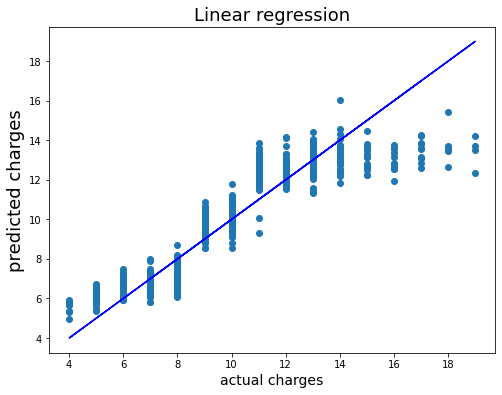

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test)
plt.plot(target_test,target_test,color='b')
plt.xlabel('actual charges',fontsize=14)
plt.ylabel('predicted charges',fontsize=18)
plt.title('Linear regression',fontsize=18)
plt.show()

best fit line covers most of the datapoints which showa good fit of our model

# Using hyper parameter tunning

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings ('ignore')

In [150]:
from sklearn.linear_model import Lasso

In [152]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [153]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.8104067304265206

In [155]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7575317822693866

# ensemble technique

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [165]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2_score',rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('cross_val+score',rfc*100)


R2_score 80.69696218340678
cross_val+score 79.19270536040808


we are getting model accuracy is 80.69 and cross validation is 79.19 which shows our model is performing well 